# Imports

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean data

In [57]:
df = pd.read_csv('data/french_apartment.csv')

df.area = df.area.round(2)

# Calculate category

In [58]:
average_price = {
  'Paris': 9224, # 09 24
  'Lyon': 4717, # 07 24
  'Marseille': 3680 # 07 24
}

def categorize_price(row):
  price = row['price'] / row['area']
  average = average_price[row.city]

  if price < average * 0.7:
    return 'low'
  elif price < average * 1.3:
    return 'normal'
  elif price < average * 1.7:
    return 'high'
  else:
    return 'scam'
  
df['category'] = df.apply(categorize_price, axis=1)

df.head()

,price,area,years of construction,balcony,garage,rating,city,category
0,718458,96.31,2023,1,0,5,Marseille,scam
1,234271,148.41,2005,1,0,1,Paris,low
2,819375,136.93,2015,0,1,3,Marseille,high
3,841559,170.10,2013,1,0,1,Lyon,normal
4,594298,38.50,2022,1,1,5,Marseille,scam


# Numpy & Pandas

## Area

In [66]:
average_area = df.area.mean()
deviation_area = df.area.std()
min_area = df.area.min()
max_area = df.area.max()

print("Moyenne de la surface : ", average_area)
print("Écart-type de la surface : ", deviation_area)
print("Surface minimale : ", min_area)
print("Surface maximale : ", max_area)

Moyenne de la surface :  110.73969
Écart-type de la surface :  51.37669580924971
Surface minimale :  20.05
Surface maximale :  199.77


## Year of construction

In [72]:
average_year = round(df['years of construction'].mean())
min_year = df['years of construction'].min()
max_year = df['years of construction'].max()

print("Moyenne de l'année de construction : ", average_year)
print("Année la plus ancienne : ", min_year)
print("Année la plus récente : ", max_year)

Moyenne de l'année de construction :  2015
Année la plus ancienne :  2005
Année la plus récente :  2024


## Balcony

In [69]:
average_balcony = df.balcony.mean()

print(f"Pourcentage de balcon : {round(average_balcony * 100, 2)} %")

Pourcentage de balcon : 50.1 %


## Category

In [70]:
category_count_total = df.category.value_counts()

print(category_count_total)

category
low       382
normal    262
scam      248
high      108
Name: count, dtype: int64


## Number of rooms

In [ ]:
rooms_average = df['number of rooms'].mean()
rooms_median = df['number of rooms'].median()
rooms_variance = df['number of rooms'].var()
rooms_deviation = df['number of rooms'].std()

print("Moyenne des chambres : ", rooms_average)
print("Médiane des chambres : ", rooms_median)
print("Variance des chambres : ", rooms_variance)
print("Écart-type des chambres : ", rooms_deviation)

# Matplop

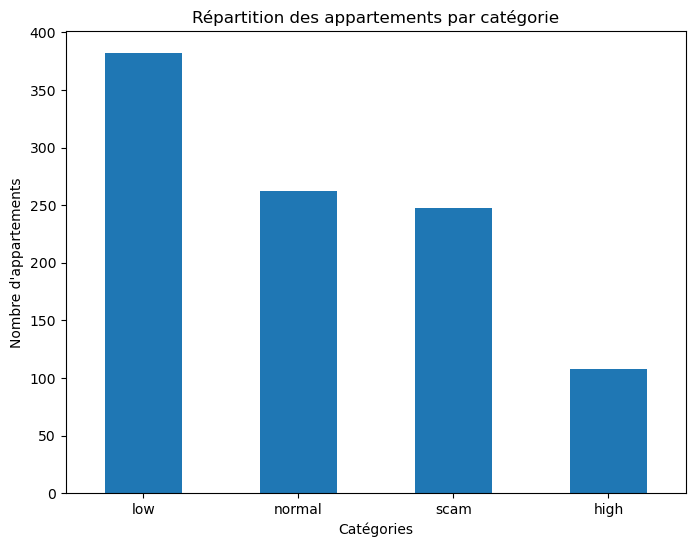

In [78]:
plt.figure(figsize=(8,6))
df['category'].value_counts().plot(kind='bar')

plt.title('Répartition des appartements par catégorie')
plt.xlabel('Catégories')
plt.ylabel("Nombre d'appartements")
plt.xticks(rotation=0)
plt.show()